In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
features = dataset.columns[-2:]

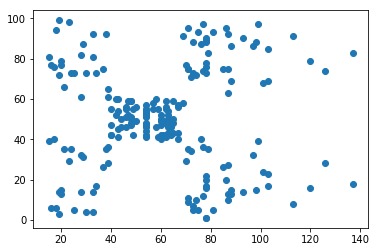

In [26]:
X = dataset[features].values
plt.scatter(X[:,0], X[:,1])

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                    n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

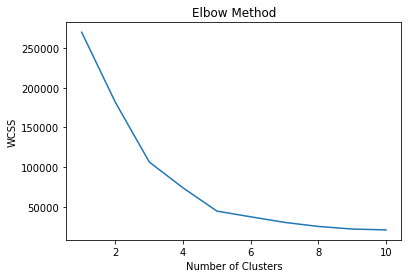

In [23]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

#### The greatest slope change happens at 5, so the optimum number of clusters is 5.

In [24]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, 
                n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

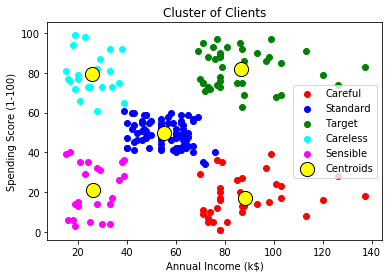

In [39]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], c='red', label='Careful')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], c='blue', label='Standard')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], c='green', label='Target')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], c='cyan', label='Careless')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], c='magenta', label='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids', edgecolor='black')
plt.title('Cluster of Clients')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.legend(loc='best')